## Cluster analysis of word embeddings

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
from topicViz.embedding import perform_pca

In [3]:
# load word embeddings
html_clean = np.load(
    'data/embedding_html_clean.npy'
)
text_html_clean = np.load(
    'data/embedding_text_html_clean.npy'
)

Text(0.5, 1.0, 'Cumulative Explained Variance Ratio vs. Number of Components')

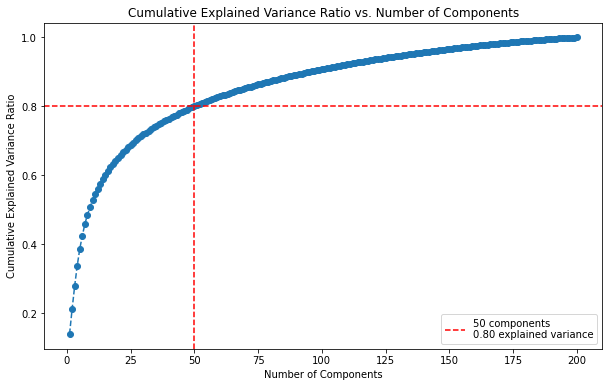

In [4]:
# html_clean
explained_variance_percentage = 90
html_clean_reduced, pca_html_clean = perform_pca(
    html_clean,
    explained_variance_ratio=explained_variance_percentage / 100
)

np.save(
    f'data/embedding_html_clean_reduced_explained_'
    f'{explained_variance_percentage}.npy',
    html_clean_reduced
)

cumulative_variance_ratio = np.cumsum(
    pca_html_clean.explained_variance_ratio_
)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(
    range(1, len(cumulative_variance_ratio) + 1),
    cumulative_variance_ratio,
    marker='o',
    linestyle='--'
)
# vertical and horizontal line for a given number of components
n_components = 50
explained_variance = cumulative_variance_ratio[n_components - 1]
ax.axvline(
    x=n_components,
    linestyle='--',
    color='r',
    label=f'{n_components} components\n{explained_variance:.2f} explained variance'
)
ax.axhline(
    y=explained_variance,
    linestyle='--',
    color='r'
)
ax.legend()

ax.set_xlabel('Number of Components')
ax.set_ylabel('Cumulative Explained Variance Ratio')
ax.set_title('Cumulative Explained Variance Ratio vs. Number of Components')


In [5]:
n_components = 50
explained_variance_percentage = int(
    100*cumulative_variance_ratio[n_components - 1]
)

html_clean_reduced = pca_html_clean.transform(
    html_clean
)[:, :n_components]

np.save(
    f'data/embedding_html_clean_reduced_explained_'
    f'{explained_variance_percentage}.npy',
    html_clean_reduced
)


In [6]:
# text html_clean
explained_variance_percentage = 90
text_html_clean_reduced, pca_text_html_clean = perform_pca(
    text_html_clean,
    explained_variance_ratio=explained_variance_percentage / 100
)

np.save(
    f'data/embedding_text_html_clean_reduced_explained_'
    f'{explained_variance_percentage}.npy',
    text_html_clean_reduced
)


Text(0.5, 1.0, 'Cumulative Explained Variance Ratio vs. Number of Components')

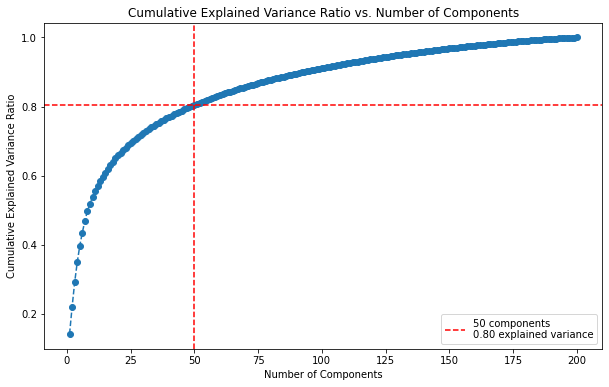

In [7]:
cumulative_variance_ratio = np.cumsum(
    pca_text_html_clean.explained_variance_ratio_
)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(
    range(1, len(cumulative_variance_ratio) + 1),
    cumulative_variance_ratio,
    marker='o',
    linestyle='--'
)

# vertical and horizontal line for a given number of components
n_components = 50
explained_variance = cumulative_variance_ratio[n_components - 1]
ax.axvline(
    x=n_components,
    linestyle='--',
    color='r',
    label=f'{n_components} components\n{explained_variance:.2f} explained variance'
)
ax.axhline(
    y=explained_variance,
    linestyle='--',
    color='r'
)
ax.legend()

ax.set_xlabel('Number of Components')
ax.set_ylabel('Cumulative Explained Variance Ratio')
ax.set_title('Cumulative Explained Variance Ratio vs. Number of Components')


In [10]:
n_components = 50
explained_variance_percentage = int(
    100*cumulative_variance_ratio[n_components - 1]
)

text_html_clean_reduced = pca_text_html_clean.transform(
    text_html_clean
)[:, :n_components]

np.save(
    f'data/embedding_text_html_clean_reduced_explained_'
    f'{explained_variance_percentage}.npy',
    text_html_clean_reduced
)